<a href="https://colab.research.google.com/github/aman-p7952/Neural-Network/blob/main/Train_TestNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [47]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np



DataLoader

In [48]:
trainingdata=torchvision.datasets.CIFAR10(root= "/content/data/", download=True,
                                          transform=torchvision.transforms.Compose([
                                           torchvision.transforms.ToTensor(),
                                           torchvision.transforms.Normalize(
                                            (0.,), (0.5,))]))
testdata=torchvision.datasets.CIFAR10(root= "/content/data/", download=True,train=False,
                                          transform=torchvision.transforms.Compose([
                                           torchvision.transforms.ToTensor(),
                                           torchvision.transforms.Normalize(
                                            (0.,), (0.5,))]))
train_loader=torch.utils.data.DataLoader(trainingdata,batch_size=32,shuffle=True)
test_loader=torch.utils.data.DataLoader(testdata,batch_size=32,shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Parameters

In [49]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs=50
lr = 0.0001

NetA()

In [50]:
class NetA(nn.Module):
  def __init__(self):
    super(NetA,self).__init__()
    self.main=nn.Sequential(
        nn.Flatten(),
        nn.Linear(32*32*3,10)
    )
  def forward(self,x):
    return self.main(x)
#netA=NetA().to(device)

NetB()

In [51]:
class NetB(nn.Module):
  def __init__(self):
    super(NetB,self).__init__()
    self.main=nn.Sequential(
        nn.Flatten(),
        nn.Linear(32*32*3,300),
        nn.ReLU(),
        nn.Linear(300,10)

    )
  def forward(self,x):
    return self.main(x)
#netB=NetB().to(device)

NetC()

In [52]:
class NetC(nn.Module):
  def __init__(self):
    super(NetC,self).__init__()
    self.main=nn.Sequential(
        nn.Conv2d(3,25,5),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Flatten(),
        nn.Linear(14*14*25,10),
    )
  def forward(self,x):
    return self.main(x)
#netC=NetC().to(device)

Train Function



In [53]:

criterion=nn.CrossEntropyLoss()

def train(net, traindataloader, testdataloader,
                                      num_epochs,
                                      learning_rate,
                                      compute_accs):
  train_history=[]
  test_history=[]
  optimizer = optim.Adam(net.parameters(), lr=learning_rate)
  for epoch in range(num_epochs):
      net=net.to(device)
      # For each batch in the dataloader
      for i, data in enumerate(traindataloader, 0):
        optimizer.zero_grad()
        data[0]=data[0].to(device)
        label=F.one_hot(data[1],10).type(torch.FloatTensor).to(device)
        output=net(data[0])
        loss=criterion(output,label)
        loss.backward()
        optimizer.step()
      
      correct_train = 0
      total_train = 0
      correct_test = 0
      total_test = 0
     
      if(compute_accs):
        with torch.no_grad():
            for data in traindataloader:
                images, labels = data
                labels=labels.to(device)
                # calculate outputs by running images through the network
                outputs = net(images.to(device))
                # the class with the highest energy is what we choose as prediction
                _ ,predicted = torch.max(outputs.data, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()
            train_acc=correct_train/total_train
            train_history.append(train_acc)

            for data in testdataloader:
                images, labels = data
                labels=labels.to(device)
                # calculate outputs by running images through the network
                outputs = net(images.to(device))
                # the class with the highest energy is what we choose as prediction
                _ ,predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
            test_acc=correct_test/total_test
            test_history.append(test_acc)
        #print('Accuracy of the network on the test images: %f ' % (
        #    correct_test / total_test))
        #print('Accuracy of the network on the train images: %f ' % (
        #   correct_train / total_train))
        print("epoch: %d  train_accracy %f test_accuracy %f" %(epoch,train_acc,test_acc))
  return train_history, test_history

plot_history function

In [54]:

def plot_history(histories):
  for i in range(len(histories)):
    plt.plot(np.arange(num_epochs),histories[i]["train_accs"],label='train_accs')
    plt.plot(np.arange(num_epochs),histories[i]["test_accs"],label='test_accs')
    plt.title(histories[i]['name'])
    plt.legend()
    plt.show()

Training and plotting

==== Training NetA ====
epoch: 0  train_accracy 0.345660 test_accuracy 0.340900
epoch: 1  train_accracy 0.376860 test_accuracy 0.368300
epoch: 2  train_accracy 0.393160 test_accuracy 0.378700
epoch: 3  train_accracy 0.395920 test_accuracy 0.385600
epoch: 4  train_accracy 0.385060 test_accuracy 0.371900
epoch: 5  train_accracy 0.387700 test_accuracy 0.373500
epoch: 6  train_accracy 0.395340 test_accuracy 0.377000
epoch: 7  train_accracy 0.397460 test_accuracy 0.378400
epoch: 8  train_accracy 0.391860 test_accuracy 0.375000
epoch: 9  train_accracy 0.421060 test_accuracy 0.397700
epoch: 10  train_accracy 0.406220 test_accuracy 0.389800
epoch: 11  train_accracy 0.413880 test_accuracy 0.394400
epoch: 12  train_accracy 0.419180 test_accuracy 0.396100
epoch: 13  train_accracy 0.414640 test_accuracy 0.395800
epoch: 14  train_accracy 0.408160 test_accuracy 0.386100
epoch: 15  train_accracy 0.424940 test_accuracy 0.398300
epoch: 16  train_accracy 0.416780 test_accuracy 0.390600
epoch: 17  train_

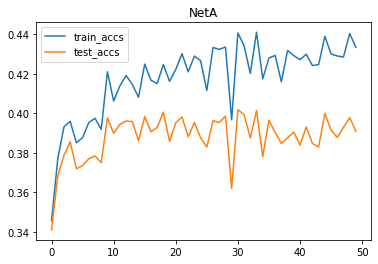

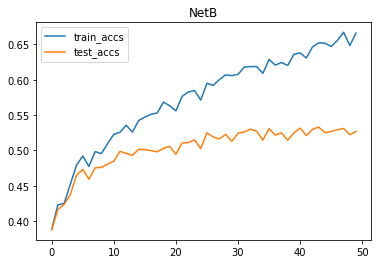

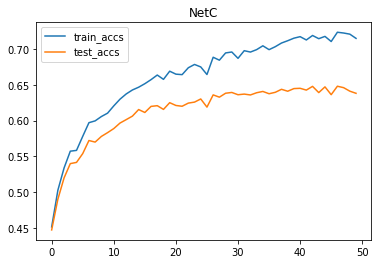

In [55]:

nets = [NetA(), NetB(), NetC(), ]
histories = []
for net in nets:
  net_name = type(net).__name__
  print(f'==== Training {net_name} ====')
  train_history, test_history = train(net, train_loader, test_loader,
                                      num_epochs=num_epochs,
                                      learning_rate=lr,
                                      compute_accs=True)
  histories.append({
  'name': net_name,
  'net': net,
  'train_accs': train_history,
  'test_accs': test_history
  })
plot_history(histories)